# Task 6 : Prediction using Decision Tree Algorithm
Create the Decision Tree Classifier and visualise it graphically<br>
The purpose is if we feed it any new data, it should be able to predict the right class accordingly<br>
Data at [https://bit.ly/3kXTdox](https://bit.ly/3kXTdox)
## Author : Vedant Kadam

Before doing anything else let's put the import statements at the top.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now let's download the data and load it into a pandas DataFrame

In [2]:
# !pip install gdown #to use if gdown not installed
!gdown https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-

Downloading...
From: https://drive.google.com/uc?id=11Iq7YvbWZbt8VXjfm06brx66b10YiwK-
To: D:\Sparks GRIP\Task 6\Iris.csv

  0%|          | 0.00/5.11k [00:00<?, ?B/s]
100%|##########| 5.11k/5.11k [00:00<?, ?B/s]


In [3]:
data=pd.read_csv("Iris.csv",index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Now let's divide the data into X and Y using loc function of pandas. But before that let's check no of species

In [4]:
pd.DataFrame(data["Species"]).value_counts()

Species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

We can see there are 3 species. So let's divide it into X, Y(for training), data_test (for later confirmation) and X_test (for testing crearted Decision Tree Classifier).

In [5]:
X=data.loc[:,"SepalLengthCm":"PetalWidthCm"]
X_test=pd.DataFrame([X.loc[1],X.loc[51],X.loc[150]])
data_test=pd.DataFrame([data.loc[1],data.loc[51],data.loc[150]])
X.drop(1,inplace=True)
X.drop(51,inplace=True)
X.drop(150,inplace=True)
Y=np.array([0 if i=="Iris-setosa" else 1 if i=="Iris-versicolor" else 2 if i=="Iris-virginica" else 3 for i in data.loc[:,"Species"]])
Y=np.delete(Y,0)
Y=np.delete(Y,49)
Y=np.delete(Y,147)
display(X)
print(Y)
print(X_test)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
...,...,...,...,...
145,6.7,3.3,5.7,2.5
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
1              5.1           3.5            1.4           0.2
51             7.0           3.2            4.7           1.4
150            5.9           3.0            5.1           1.8


## Defining Decision Tree Algorithm

Now that we have completed defining the data let's put it into a decision tree classifier of scikitlearn

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtclass=DecisionTreeClassifier()
dtclass.fit(X,Y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## Predicting on Decision Tree

Now let's try the test data here. The first test data is for setosa species, 2nd is for versicolor and 3rd for virginica

In [7]:
display(data_test)
print(dtclass.predict(X_test))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
51,7.0,3.2,4.7,1.4,Iris-versicolor
150,5.9,3.0,5.1,1.8,Iris-virginica


[0 1 2]


As we can see here it has successfully predicted all 3

## Visualise Decision Tree
Now let's visualise the trained decision tree

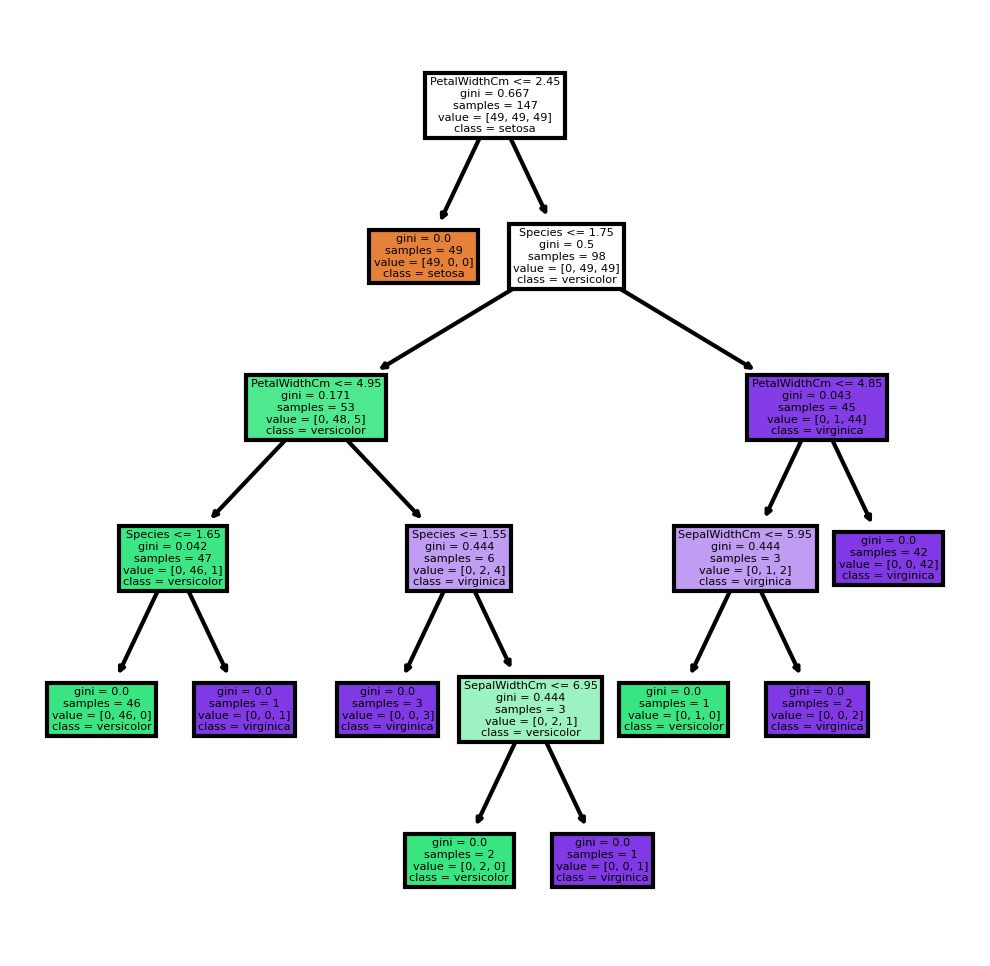

In [8]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtclass,feature_names=data.columns[1:],filled = True,class_names=['setosa', 'versicolor', 'virginica'])
fig.savefig('decisiontree.png')

Now we can see the trained tree